In [1]:
import os
import cv2 
import keras
import random
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 
from keras.models import Sequential,load_model
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense #these are the layers used in CNN

In [2]:
path=r'C:\Users\sahoo\Desktop\Models\Driver drowsiness\Train'
labels=['Close_eye','Open_eye']
img_cube=[]
img_size=100
print("Reading..")
for i in os.listdir(path):
    final_path=path+'\\'+i #or we can do os.path.join(,)
    label=labels.index(i)
    for j in os.listdir(final_path):
        try:
            img=cv2.imread(final_path+'\\'+j,cv2.IMREAD_GRAYSCALE)
            img=cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
            img=cv2.resize(img,(img_size,img_size))
            img_cube.append([img,label])
        except Exception as e:
            pass
    print(str(i)+" done")
print("End!!")
len(img_cube),img_cube[0][0]

Reading..
Close_eye done
Open_eye done
End!!


(22881,
 array([[[38, 38, 38],
         [40, 40, 40],
         [43, 43, 43],
         ...,
         [89, 89, 89],
         [89, 89, 89],
         [89, 89, 89]],
 
        [[38, 38, 38],
         [40, 40, 40],
         [43, 43, 43],
         ...,
         [91, 91, 91],
         [91, 91, 91],
         [90, 90, 90]],
 
        [[38, 38, 38],
         [40, 40, 40],
         [42, 42, 42],
         ...,
         [93, 93, 93],
         [92, 92, 92],
         [92, 92, 92]],
 
        ...,
 
        [[52, 52, 52],
         [53, 53, 53],
         [57, 57, 57],
         ...,
         [79, 79, 79],
         [79, 79, 79],
         [80, 80, 80]],
 
        [[51, 51, 51],
         [52, 52, 52],
         [56, 56, 56],
         ...,
         [81, 81, 81],
         [81, 81, 81],
         [81, 81, 81]],
 
        [[51, 51, 51],
         [51, 51, 51],
         [53, 53, 53],
         ...,
         [80, 80, 80],
         [80, 80, 80],
         [82, 82, 82]]], dtype=uint8))

In [3]:
random.shuffle(img_cube)

In [4]:
feature=[]
target=[]
for i,j in img_cube:
    feature.append(i)
    target.append(j)
feature=np.array(feature)
target=np.array(target)

In [5]:
feature=feature/255.0  #scale down pixel value

0

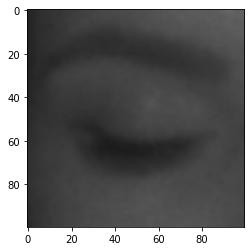

In [6]:
plt.imshow(feature[22880])
target[22880]

1

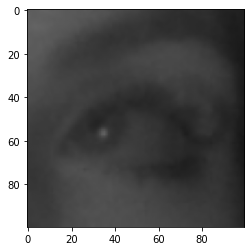

In [7]:
plt.imshow(feature[0])
target[0]

In [8]:
np.array(img_cube[22000][0]).shape

(100, 100, 3)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,random_state=42,test_size=0.25)

In [10]:
x_train

array([[[[0.41176471, 0.41176471, 0.41176471],
         [0.41960784, 0.41960784, 0.41960784],
         [0.42745098, 0.42745098, 0.42745098],
         ...,
         [0.63921569, 0.63921569, 0.63921569],
         [0.64313725, 0.64313725, 0.64313725],
         [0.65098039, 0.65098039, 0.65098039]],

        [[0.41176471, 0.41176471, 0.41176471],
         [0.41960784, 0.41960784, 0.41960784],
         [0.42745098, 0.42745098, 0.42745098],
         ...,
         [0.62745098, 0.62745098, 0.62745098],
         [0.63529412, 0.63529412, 0.63529412],
         [0.63921569, 0.63921569, 0.63921569]],

        [[0.41176471, 0.41176471, 0.41176471],
         [0.41960784, 0.41960784, 0.41960784],
         [0.43137255, 0.43137255, 0.43137255],
         ...,
         [0.61568627, 0.61568627, 0.61568627],
         [0.61960784, 0.61960784, 0.61960784],
         [0.62352941, 0.62352941, 0.62352941]],

        ...,

        [[0.50588235, 0.50588235, 0.50588235],
         [0.50588235, 0.50588235, 0.50588235]

# Build and train our model

In [12]:
print("Tensorflow version: ",tf.__version__)
print("Keras version: ",keras.__version__)
sklearn.show_versions()


cnn2=Sequential()
#convolutional layer-1
cnn2.add(Conv2D(32, kernel_size=(3, 3), activation='relu',  padding='same'))
cnn2.add(MaxPooling2D(2,2))
#convolutional layer-2
cnn2.add(Conv2D(64, kernel_size=(3, 3), activation='relu',  padding='same'))
cnn2.add(MaxPooling2D(2,2))
#convolutional layer-3
cnn2.add(Conv2D(128, kernel_size=(3, 3), activation='relu',  padding='same'))
cnn2.add(MaxPooling2D(2,2))

#convolutional layer-4
cnn2.add(Conv2D(256, kernel_size=(3, 3), activation='relu',  padding='same'))
cnn2.add(MaxPooling2D(2,2))

#flatten layer
#it convert all the features data into 1-d array format or a list
cnn2.add(Flatten(input_shape=x_train.shape[1:] ))

cnn2.add(Dense(2048,activation='relu'))

cnn2.add(Dense(1024,activation='relu'))

cnn2.add(Dense(512,activation='relu'))

cnn2.add(Dense(256,activation='relu'))

#densly connected layer
cnn2.add(Dense(128,activation='relu'))

#output layer
cnn2.add(Dense(2,activation='softmax'))


cnn2.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
#logit=true when we not use any normalization for last layer that means if we don't apply any act. fun then keep logit=true
#with RMSPROP got 74-72%
#SGD found 57%



history2=cnn2.fit(  x_train,
          y_train,
          verbose=1,
          epochs=10,  #20
          batch_size=32,  #15
          validation_data=(x_test,y_test) )

Tensorflow version:  2.3.0
Keras version:  2.4.3

System:
    python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
executable: D:\Anaconda\envs\MyEnv\python.exe
   machine: Windows-10-10.0.18362-SP0

Python dependencies:
          pip: 20.3.3
   setuptools: 51.3.3.post20210118
      sklearn: 0.23.2
        numpy: 1.19.2
        scipy: 1.5.2
       Cython: 0.29.14
       pandas: 1.1.3
   matplotlib: 3.3.2
       joblib: 1.0.0
threadpoolctl: 2.1.0

Built with OpenMP: True
Epoch 1/10
537/537 [==============================] - 528s 983ms/step - loss: 0.2998 - accuracy: 0.8531 - val_loss: 0.1267 - val_accuracy: 0.9528
Epoch 2/10
537/537 [==============================] - 524s 976ms/step - loss: 0.1024 - accuracy: 0.9644 - val_loss: 0.1527 - val_accuracy: 0.9453
Epoch 3/10
537/537 [==============================] - 523s 973ms/step - loss: 0.0678 - accuracy: 0.9769 - val_loss: 0.0692 - val_accuracy: 0.9766
Epoch 4/10
537/537 [==============================] - 508s 945ms/

In [23]:
print("Tensorflow version: ",tf.__version__)
print("Keras version: ",keras.__version__)
sklearn.show_versions()


cnn2=Sequential()
#convolutional layer-1
cnn2.add(Conv2D(32, kernel_size=(3, 3), activation='relu',  padding='same'))
cnn2.add(MaxPooling2D(2,2))
#convolutional layer-2
cnn2.add(Conv2D(64, kernel_size=(3, 3), activation='relu',  padding='same'))
cnn2.add(MaxPooling2D(2,2))
#convolutional layer-3
cnn2.add(Conv2D(128, kernel_size=(3, 3), activation='relu',  padding='same'))
cnn2.add(MaxPooling2D(2,2))

#convolutional layer-4
cnn2.add(Conv2D(256, kernel_size=(3, 3), activation='relu',  padding='same'))
cnn2.add(MaxPooling2D(2,2))

#flatten layer
#it convert all the features data into 1-d array format or a list
cnn2.add(Flatten(input_shape=x_train.shape[1:] ))

cnn2.add(Dense(2048,activation='relu'))

cnn2.add(Dense(1024,activation='relu'))

cnn2.add(Dense(512,activation='relu'))

cnn2.add(Dense(256,activation='relu'))

#densly connected layer
cnn2.add(Dense(128,activation='relu'))

#output layer
cnn2.add(Dense(1,activation='sigmoid'))


cnn2.compile(optimizer='Adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])
#logit=true when we not use any normalization for last layer that means if we don't apply any act. fun then keep logit=true
#with RMSPROP got 74-72%
#SGD found 57%


history2=cnn2.fit(  x_train,
          y_train,
          verbose=1,
          epochs=10,  #20
          batch_size=32,  #15
          validation_data=(x_test,y_test) )

Tensorflow version:  2.3.0
Keras version:  2.4.3

System:
    python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
executable: D:\Anaconda\envs\MyEnv\python.exe
   machine: Windows-10-10.0.18362-SP0

Python dependencies:
          pip: 20.3.3
   setuptools: 51.3.3.post20210118
      sklearn: 0.23.2
        numpy: 1.19.2
        scipy: 1.5.2
       Cython: 0.29.14
       pandas: 1.1.3
   matplotlib: 3.3.2
       joblib: 1.0.0
threadpoolctl: 2.1.0

Built with OpenMP: True
Epoch 1/10
537/537 [==============================] - 480s 895ms/step - loss: 0.2880 - accuracy: 0.8708 - val_loss: 0.1558 - val_accuracy: 0.9409
Epoch 2/10
537/537 [==============================] - 506s 942ms/step - loss: 0.0834 - accuracy: 0.9714 - val_loss: 0.0674 - val_accuracy: 0.9790
Epoch 3/10
537/537 [==============================] - 449s 837ms/step - loss: 0.0716 - accuracy: 0.9741 - val_loss: 0.0490 - val_accuracy: 0.9851
Epoch 4/10
537/537 [==============================] - 422s 786ms/

[array([[3.704764e-08]], dtype=float32), array([[1.1303205e-06]], dtype=float32), array([[7.74849e-07]], dtype=float32), array([[1.]], dtype=float32), array([[0.07580888]], dtype=float32), array([[1.]], dtype=float32), array([[1.]], dtype=float32), array([[1.]], dtype=float32), array([[3.5674458e-07]], dtype=float32), array([[0.00076401]], dtype=float32)]
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 25, 25, 64)        0         
__________________________

D:\Anaconda\envs\MyEnv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


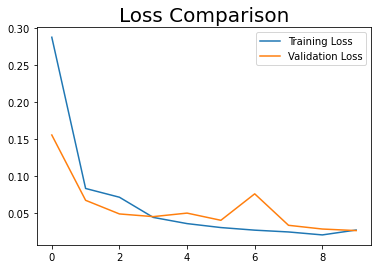

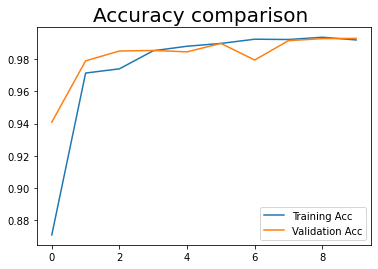

In [24]:
y_pred=[]
for i in range(len(x_test)):
        y_pred.append(cnn2.predict(x_test[i].reshape(1,100,100,3)))
        
len(y_test),len(y_pred)

print(y_pred[:10])

#as prediction value returning 3 values array but we want prediction that shows a particular class (ie; 0 or 1 or 2)

result=[]
for i in range(len(x_test)):
    result.append(np.argmax(y_pred[i],axis=1)) #it will take index value for which value is maxiumum of that array
result[:10]

cnn2.summary()

print("*-*"*40)
print("Accuracy Found: ",accuracy_score(y_test,np.array(result)))
#using adam accuracy was 83%
#using adadelta accuracy was 89%
print("*-*"*40)
print("Confusion Matrix:\n",confusion_matrix(y_test,np.array(result))) 
print("*-*"*40)
print("Classification Report:\n",classification_report(y_test,np.array(result)))
print("*-*"*40)

#plt.figure(figsize=(15,9))
plt.title('Loss Comparison',fontsize=20)
plt.plot(history2.history['loss'],)
plt.plot(history2.history['val_loss'])
plt.legend(['Training Loss','Validation Loss'])
plt.show()


#plt.figure(figsize=(15,9))
plt.title('Accuracy comparison ',fontsize=20)
plt.plot(history2.history['accuracy'],)
plt.plot(history2.history['val_accuracy'])
plt.legend(['Training Acc','Validation Acc'])
plt.show()

In [19]:
y_test[:10]

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0])

In [15]:
# Evaluating the Predictions on the Model

score = cnn2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03703976050019264
Test accuracy: 0.9919594526290894


In [16]:
y_pred=[]
for i in range(len(x_test)):
        y_pred.append(cnn2.predict(x_test[i].reshape(1,100,100,3)))
        
len(y_test),len(y_pred)

(5721, 5721)

In [17]:
y_pred[:10]  #to get max probability value we use argmax

[array([[0.99772483, 0.0022752 ]], dtype=float32),
 array([[1.2945454e-15, 1.0000000e+00]], dtype=float32),
 array([[1.5168107e-06, 9.9999845e-01]], dtype=float32),
 array([[5.5218325e-04, 9.9944776e-01]], dtype=float32),
 array([[9.9990654e-01, 9.3492898e-05]], dtype=float32),
 array([[9.999999e-01, 9.910605e-08]], dtype=float32),
 array([[9.9999464e-01, 5.3182112e-06]], dtype=float32),
 array([[9.999118e-01, 8.823752e-05]], dtype=float32),
 array([[3.7767322e-04, 9.9962234e-01]], dtype=float32),
 array([[9.9999797e-01, 1.9914128e-06]], dtype=float32)]

In [18]:
#as prediction value returning 3 values array but we want prediction that shows a particular class (ie; 0 or 1 or 2)

result=[]
for i in range(len(x_test)):
    result.append(np.argmax(y_pred[i],axis=1)) #it will take index value for which value is maxiumum of that array
result[:10]

[array([0], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64)]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 256)      

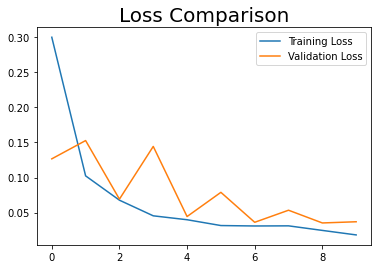

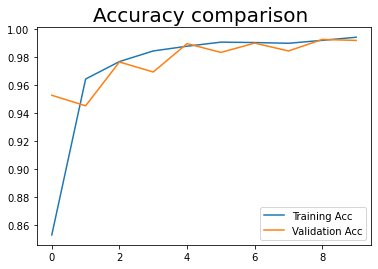

In [20]:
cnn2.summary()

print("*-*"*40)
print("Accuracy Found: ",accuracy_score(y_test,np.array(result)))
#using adam accuracy was 83%
#using adadelta accuracy was 89%
print("*-*"*40)
print("Confusion Matrix:\n",confusion_matrix(y_test,np.array(result))) 
print("*-*"*40)
print("Classification Report:\n",classification_report(y_test,np.array(result)))
print("*-*"*40)

#plt.figure(figsize=(15,9))
plt.title('Loss Comparison',fontsize=20)
plt.plot(history2.history['loss'],)
plt.plot(history2.history['val_loss'])
plt.legend(['Training Loss','Validation Loss'])
plt.show()


#plt.figure(figsize=(15,9))
plt.title('Accuracy comparison ',fontsize=20)
plt.plot(history2.history['accuracy'],)
plt.plot(history2.history['val_accuracy'])
plt.legend(['Training Acc','Validation Acc'])
plt.show()

In [21]:
#pickle and joblib
from keras.models import save_model

# Save the model
#filepath = 'C:/Users/sahoo/Desktop/Banana_leaf_disease'
#save_model(cnn2, filepath)

cnn2.save("Drowsiness_classifier.h5")

# Test with new image

In [43]:
path=r'C:\Users\sahoo\Desktop\Models\Driver drowsiness'
new_img=cv2.imread(path+'//'+"test-1.jpg")

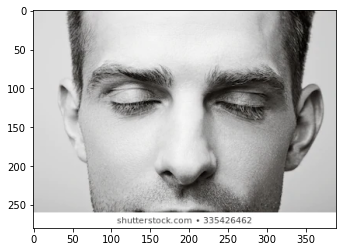

In [44]:
import matplotlib.pyplot as plt
plt.imshow(new_img)

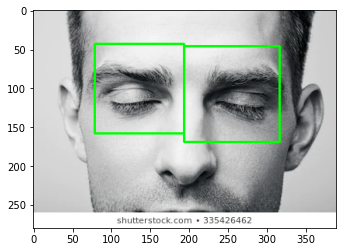

In [45]:
facecascade=cv2.CascadeClassifier(cv2.data.haarcascades +"haarcascade_frontalface_default.xml")
eyecascade=cv2.CascadeClassifier(cv2.data.haarcascades +"haarcascade_eye.xml")

#as face and eye detection operation only support grayscale image so we have to conver them into grayscale first
gray=cv2.cvtColor(new_img,cv2.COLOR_BGR2GRAY)

eye=eyecascade.detectMultiScale(gray,1.1,4)

for (i,j,k,l) in eye:
    cv2.rectangle(new_img,(i,j),(i+k,j+l),(0,255,0),2)
plt.imshow(cv2.cvtColor(new_img,cv2.COLOR_BGR2RGB))

In [46]:
#NOW time to crop those image from entire image to do prediction because during training time we only classify eye part only.
eyecascade=cv2.CascadeClassifier(cv2.data.haarcascades +"haarcascade_eye.xml")
grayscale_img=cv2.cvtColor(new_img,cv2.COLOR_BGR2GRAY)

croppedeye=eyecascade.detectMultiScale(grayscale_img,1.1,4)
for i,j,k,l in croppedeye:
    roi_gray=grayscale_img[j:j+l,i:i+k] #roi is for region of interest
    roi_color=new_img[j:j+l,i:i+k]
    eyes=eyecascade.detectMultiScale(roi_gray)
    if len(eyes) == 0:
        print("Eyes not detected")
    else:
        for (a,b,c,d) in eyes:
            eye_roi=roi_color[b:b+d,a:a+c]

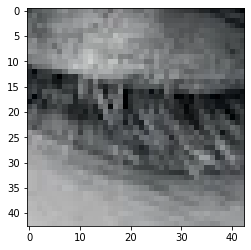

In [47]:
plt.imshow(cv2.cvtColor(eye_roi,cv2.COLOR_BGR2RGB))

In [48]:
eye_roi.shape

(43, 43, 3)

In [49]:
eye_roi=cv2.resize(eye_roi,(100,100))
eye_roi=eye_roi.reshape((1,100,100,3))

In [50]:
eye_roi.shape

(1, 100, 100, 3)

In [51]:
cnn2.predict(eye_roi)

array([[1.]], dtype=float32)

In [87]:
from keras.models import load_model

In [88]:
mymodel=load_model("Drowsiness_classifier.h5")
mymodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 256)      

In [93]:
mymodel.predict(eye_roi)

array([[0., 1.]], dtype=float32)

In [90]:
import numpy as np

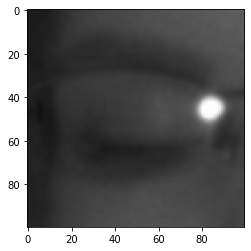

In [91]:
plt.imshow(feature[200])

In [79]:
target[200]

0